In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def convert2epsg(file):
    gdf = gpd.read_file(file)
    return gdf.to_crs({'init': 'epsg:3310','units':'m'})

In [3]:
gdf = convert2epsg(r"/Users/ZhengLi/Downloads/DISD_Campuses/DISD_Campuses.shp")
ghb = convert2epsg(r"/Users/ZhengLi/Downloads/DISD_High/DISD_High.shp")
gmb = convert2epsg(r"/Users/ZhengLi/Downloads/DISD_Middle/DISD_Middle.shp")
geb = convert2epsg(r"/Users/ZhengLi/Downloads/DISD_Elementary/DISD_Elementary.shp")
gtd = convert2epsg(r"/Users/ZhengLi/Downloads/DISD_Trustee_Districts/DISD_Trustee_Districts.shp")
rail = convert2epsg(r"/Users/ZhengLi/SMU_OneDrive/OneDrive - Southern Methodist University/SMU/2018Fall/Bayesian Statistics/Project/data/rail_station_prj.shp")
df = pd.read_csv(r'/Users/ZhengLi/Downloads/Data.csv')

In [4]:
gtb = convert2epsg(r"/Users/ZhengLi/Downloads/DISD_Trustee_Districts/DISD_Trustee_Districts.shp")

In [5]:
gdf = gdf.loc[gdf.LEVEL2.apply(lambda x: True if x in ['Middle', 'Elementary','High'] else False),:]

In [6]:
gdf = gdf.loc[:,['SCHOOLNAME','LEVEL2','FULLNAME','geometry']]

In [7]:
gdf.head()

,SCHOOLNAME,LEVEL2,FULLNAME,geometry
0,Franklin International Exploratory Academy Mid...,Middle,Benjamin Franklin International Exploratory Ac...,POINT (2153334.290724595 -304737.2756374292)
1,Seagoville Middle School,Middle,Seagoville Middle School,POINT (2177130.7301998 -322015.9002579185)
2,Kennedy-Curry Middle School,Middle,Kennedy-Curry Middle School,POINT (2161795.577757093 -328259.8936263155)
3,Dade Middle School,Middle,Billy Earl Dade Middle School,POINT (2157417.19718433 -316769.0317791677)
4,Lang Sr. Middle School,Middle,Harold W. Lang Sr. Middle School,POINT (2164476.3871318 -311512.6705161431)


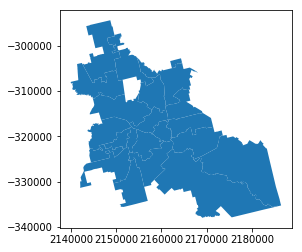

In [8]:
ghb.plot()

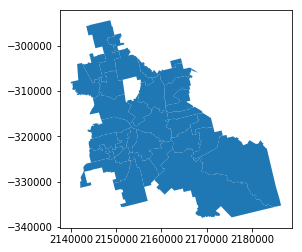

In [9]:
gmb.plot()

In [10]:
def AverageDistance2(obj, AllSchools):
    idx = gtb['geometry'].contains(obj['geometry'])
    district = gtb.loc[np.where(idx==True)[0][0],'geometry']
    schools = Allschools.loc[AllSchools['geometry'].within(district),:]
    dists = schools.loc[:,'geometry'].distance(obj['geometry'])
    if len(schools)==1:
        return 0
    else:
        return dists.sum()/(schools.shape[0]-1)

In [485]:
def AverageDistance(obj, AllSchools):
    if obj['LEVEL2']=='High':
        idx = ghb['geometry'].contains(obj['geometry'])
        district = ghb.loc[np.where(idx==True)[0][0],'geometry']
        schools = Allschools.loc[AllSchools['geometry'].within(district),:]
        dists = schools.loc[:,'geometry'].distance(obj['geometry'])
    elif obj['LEVEL2'] =='Middle':
        idx = gmb['geometry'].contains(obj['geometry'])
        district = gmb.loc[6,'geometry']
        schools = Allschools.loc[AllSchools['geometry'].within(district),:]
        dists = schools.loc[:,'geometry'].distance(obj['geometry'])
    elif obj['LEVEL2'] =='Elementary':
        idx = geb['geometry'].contains(obj['geometry'])
        district = geb.loc[np.where(idx==True)[0][0],'geometry']
        schools = Allschools.loc[AllSchools['geometry'].within(district),:]
        dists = schools.loc[:,'geometry'].distance(obj['geometry'])
        
    if len(schools)==1:
        return 0
    else:
        return dists.sum()/(schools.shape[0]-1)

In [11]:
Allschools = gdf.copy()
gdf['AverageDistance'] = gdf.loc[:,['LEVEL2','FULLNAME','geometry']].apply(lambda x: AverageDistance2(x, Allschools),axis=1)

In [12]:
gdf.groupby(by='LEVEL2').count()

,SCHOOLNAME,FULLNAME,geometry,AverageDistance
LEVEL2,,,,
Elementary,141,141,141,141
High,22,22,22,22
Middle,31,31,31,31


In [14]:
gdf.describe()

,AverageDistance
count,194.000000
mean,5393.595266
std,1783.394532
min,2870.754953
25%,4269.046236
50%,4915.754636
75%,6167.052072
max,12272.608780


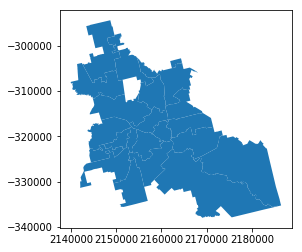

In [489]:
ghb.plot()

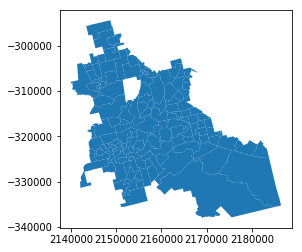

In [490]:
geb.plot()

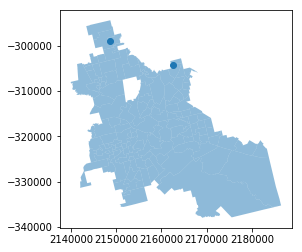

In [491]:
fig,ax = plt.subplots(1,1)
geb.plot(ax=ax,alpha=0.5)
gdf.loc[17:18,'geometry'].plot(ax=ax)

In [492]:

df.head()

,SchoolName,School Type,Address,City,Zip,Trustee District,Choice/Magnet School,Grade Span,#Students,Diversity,...,SLN,NAME_OFFICIAL,SCHOOL_TYPE,SCHOOL_STREET_NO,SCHOOL_STREET_DI,SCHOOL_STREET_NM,SCHOOL_STREET_TP,SCHOOL_CITY,SCHOOL_ZIP,2016-17SEI
0,BRYAN ADAMS HIGH SCHOOL,HS,2101 MILLMAR DR,DALLAS,75228,3,Y,12-Sep,2158,0.25095,...,1,BRYAN ADAMS HIGH SCHOOL,1,2101,NaN,MILLMAR,DR,DALLAS,75228,46.4
1,JOHN Q. ADAMS ELEMENTARY SCHOOL,ES,8239 LAKE JUNE RD,DALLAS,75217,4,N,K-5,722,0.24790,...,101,JOHN Q. ADAMS ELEMENTARY SCHOOL,3,8239,NaN,LAKE JUNE,RD,DALLAS,75217,45.9
2,NATHAN ADAMS ELEMENTARY SCHOOL,ES,12600 WELCH RD,DALLAS,75244,1,N,K-5,476,0.24635,...,233,NATHAN ADAMS ELEMENTARY SCHOOL,3,12600,NaN,WELCH,RD,DALLAS,75244,50.8
3,W.H. ADAMSON HIGH SCHOOL,HS,309 E NINTH ST,DALLAS,75203,7,Y,12-Sep,1621,0.24860,...,2,W.H. ADAMSON HIGH SCHOOL,1,201,E,NINTH,ST,DALLAS,75203,47.7
4,BIRDIE ALEXANDER ELEMENTARY SCHOOL,ES,1830 GOLDWOOD DR,DALLAS,75232,6,N,K-5,349,0.19720,...,235,BIRDIE ALEXANDER ELEMENTARY SCHOOL,3,1830,NaN,GOLDWOOD,DR,DALLAS,75232,46.4


In [493]:
gdf.loc[:,['SCHOOLNAME','AverageDistance']].head()

,SCHOOLNAME,AverageDistance
0,Franklin International Exploratory Academy Mid...,3008.970977
1,Seagoville Middle School,35260.820799
2,Kennedy-Curry Middle School,30024.834880
3,Dade Middle School,15749.905491
4,Lang Sr. Middle School,16195.509599


In [494]:
gdf.shape

(194, 5)

In [15]:
df['name']= df['SchoolName'].apply(lambda x: x.lower())

In [16]:
gdf['name']= gdf['FULLNAME'].apply(lambda x: x.lower())

In [17]:
gdf

,SCHOOLNAME,LEVEL2,FULLNAME,geometry,AverageDistance,name
0,Franklin International Exploratory Academy Mid...,Middle,Benjamin Franklin International Exploratory Ac...,POINT (2153334.290724595 -304737.2756374292),6415.899722,benjamin franklin international exploratory ac...
1,Seagoville Middle School,Middle,Seagoville Middle School,POINT (2177130.7301998 -322015.9002579185),7380.017507,seagoville middle school
2,Kennedy-Curry Middle School,Middle,Kennedy-Curry Middle School,POINT (2161795.577757093 -328259.8936263155),7492.457374,kennedy-curry middle school
3,Dade Middle School,Middle,Billy Earl Dade Middle School,POINT (2157417.19718433 -316769.0317791677),6584.205386,billy earl dade middle school
4,Lang Sr. Middle School,Middle,Harold W. Lang Sr. Middle School,POINT (2164476.3871318 -311512.6705161431),6604.952406,harold w. lang sr. middle school
5,Richards STEAM Academy Middle School,Middle,Ann Richards STEAM Academy Middle School,POINT (2167197.763814454 -314453.8509375164),5795.551851,ann richards steam academy middle school
6,Long Middle School,Middle,J.L. Long Middle School,POINT (2158560.461616143 -312403.7835348495),4847.751981,j.l. long middle school
7,Rusk Middle School,Middle,Thomas J. Rusk Middle School,POINT (2150335.665893057 -312200.8444523215),5986.980242,thomas j. rusk middle school
8,Medrano Middle School,Middle,Francisco Medrano Middle School,POINT (2145334.891930921 -308213.6440331889),7130.899699,francisco medrano middle school
9,Garcia Middle School,Middle,Hector Garcia Middle School,POINT (2154305.880830271 -319984.0086333971),4811.839342,hector garcia middle school


In [18]:
df2 = df.join(gdf.set_index('name'),on='name',how='inner')

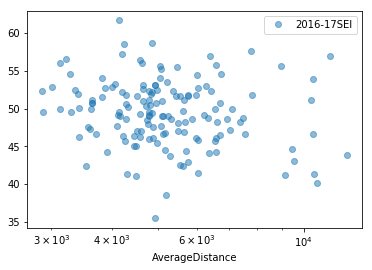

In [19]:
df2.plot(x='AverageDistance',y='2016-17SEI',alpha=0.5,linestyle='',marker='o',logx=True)

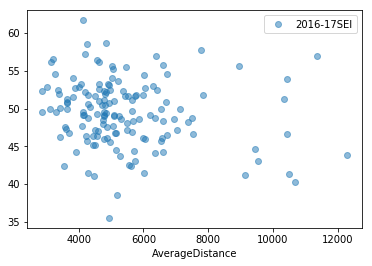

In [20]:
df2.plot(x='AverageDistance',y='2016-17SEI',alpha=0.5,linestyle='',marker='o',logx=False)

In [21]:
def NumRails(x):
    dists = rail['geometry'].distance(x)
    return sum(dists<=1500)

In [22]:
gdf['NumberOfRail']=gdf['geometry'].apply(lambda x: NumRails(x))

In [23]:
appenddf = gdf.loc[:,['name','AverageDistance','NumberOfRail']]

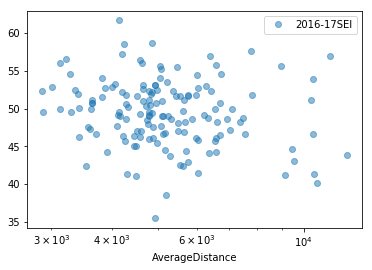

In [24]:
df2 = df.join(appenddf.set_index('name'),on='name',how='left')
df2.plot(x='AverageDistance',y='2016-17SEI',alpha=0.5,linestyle='',marker='o',logx=True)

In [25]:
df2.to_csv('data_spatial.csv')

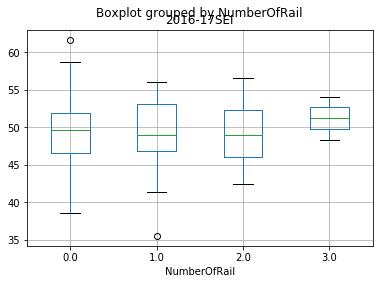

In [508]:
df2.boxplot(column='2016-17SEI',by='NumberOfRail')

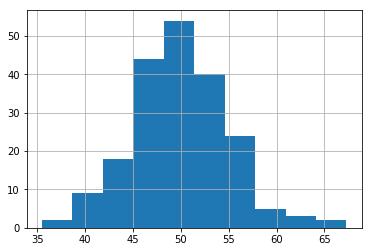

In [509]:
df2['2016-17SEI'].hist()

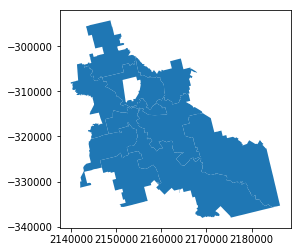

In [511]:
gtb.plot()

In [75]:
z = pd.read_excel(r"/Users/ZhengLi/SMU_OneDrive/OneDrive - Southern Methodist University/SMU/Z89_new.xls",
                 sheet_name='L9',
                 header=None,
                 usecols = 274,
                 nrows = 289,
                 na_values='nan',
                 )

In [76]:
print(z.shape)
z = z.values

(279, 256)


In [77]:
z[np.isnan(z)]=0

In [78]:
z9 = np.zeros((289,274))

In [79]:
z9[0:279,0:256] = z

In [80]:
np.savetxt("Z9_new.csv", z8, delimiter=",")

In [120]:
z8[75,166]

-193.1898217206

In [88]:
z8[148,204]

-223.4734824455

In [117]:
z8[204,148]

-202.4418814766

In [113]:
z8[75,166]

-193.1898217206

In [90]:
z8[166,74]

-185.6282969811

In [118]:
z9[74,166]

-260.2203479718

In [125]:
z = pd.read_csv(r'/Users/ZhengLi/SMU_OneDrive/OneDrive - Southern Methodist University/SMU/Z8_new.csv',header=None).values

In [127]:
z[73:77,164:168]

array([[-228.23649144, -226.38961958, -212.39802093, -184.30468021],
       [-227.94819645, -220.59970001, -198.58309715, -164.73134752],
       [-223.77842956, -215.73010122, -193.18982172, -164.86727732],
       [-220.46360569, -218.45383452, -202.99371043, -182.35370506]])

In [128]:
z[164:168,73:77]

array([[-198.40942209, -198.18845008, -176.47788908, -166.01943764],
       [-201.17848934, -187.46243071, -156.23213424, -140.84736205],
       [-205.99233226, -185.62829698, -156.28123195, -145.68792403],
       [-212.2941257 , -193.87599865, -180.95359436, -175.11779725]])

In [129]:
z[149,204]

-217.9473423104

In [131]:
z[148,204]

-223.4734824455

In [130]:
z[204,149]

-211.8258345207